In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms as T
from torchvision.datasets import CIFAR10
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class HyperParameters(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
        
    def __repr__(self):
        return '\n'.join(f"Parameter: {k:<16} Value: {v}" for k,v in self.items())
            
        

In [30]:
class CIFAR10DataSet():
    def __init__(self, hparams):
        super().__init__()
        self.hparams = HyperParameters(hparams)
        #self.mean = (0.4914, 0.4822, 0.4465)
        #self.std = (0.2471, 0.2435, 0.2616)
        
    def train_dataloader(self):
        transform = T.Compose(
            [
                T.Resize((self.hparams.img_size, self.hparams.img_size)),
                T.ToTensor(),
                T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ]
        )
        dataset = CIFAR10(
            root=self.hparams.data_dir, 
            train=True, 
            download=True, 
            transform=transform,
        )
        dataloader = DataLoader(
            dataset, 
            batch_size=self.hparams.batch_size, 
            shuffle=True, 
            num_workers=self.hparams.num_workers,
        )
        return dataloader
    
    def get_classes(self):
        return ('airplane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
    def _imshow(self, imgs, labels):
        if not isinstance(imgs, list):
            imgs = [imgs]
        classes = self.get_classes()
        fig, axs = plt.subplots(ncols=4, nrows=max(len(imgs)//4,1), squeeze=False)
        for i, img in enumerate(imgs):
            img = img / 2 + 0.5
            npimg = img.numpy()
            axs[i//4, i%4].imshow(np.transpose(npimg, (1, 2, 0)))
            axs[i//4, i%4].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            axs[i//4, i%4].title.set_text(classes[labels[i]])
        
    def show_grid(self, dataloader):
        it = iter(dataloader)
        images, labels = next(it)
        self._imshow(make_grid(images), labels)

    

In [31]:
cds_config = {
    'data_dir':"./data",
    'batch_size': 32,
    'num_workers': 4,
    'img_size':224,
}


In [32]:
cds = CIFAR10DataSet(cds_config)
dl = cds.train_dataloader()

Files already downloaded and verified


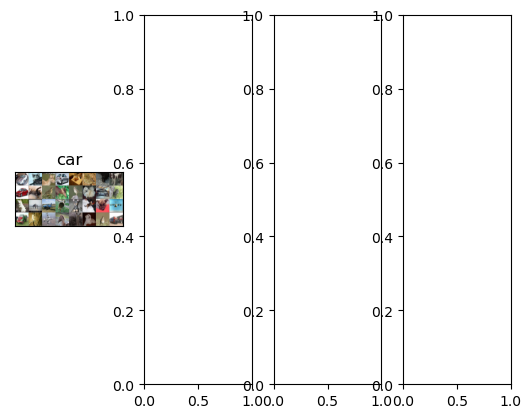

In [33]:
cds.show_grid(dl)